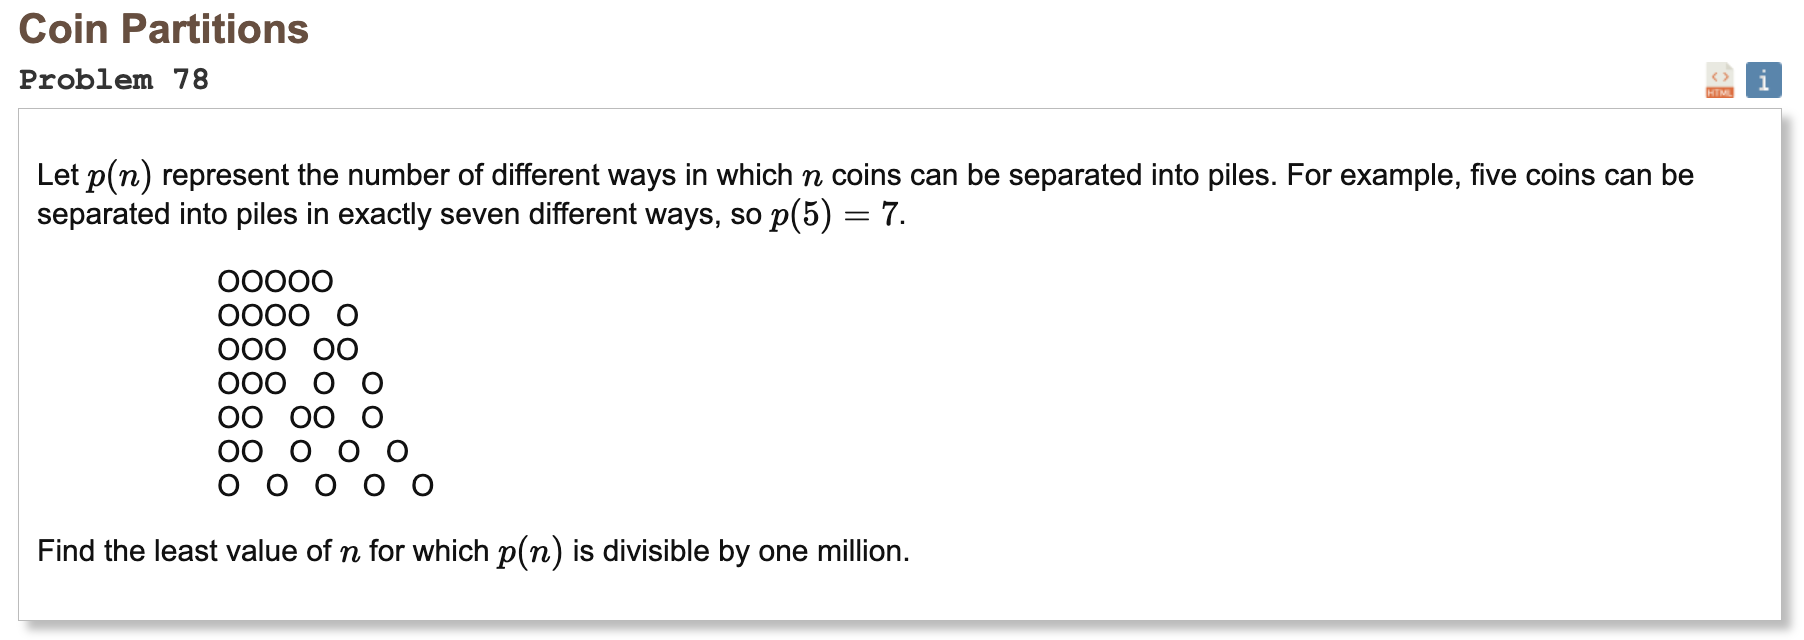

## Initial approach

Understand the example  

For p(5):  
First pile: 5-4-3-3-2-2-1  
Rest of pile: 0-1-2-2-3-3-4  

Lets benchmark from p(6):
oooooo  
ooooo o  
oooo oo  
oooo o o  
ooo ooo  
ooo oo o  
ooo o o o  
oo oo oo  
oo oo oo  
oo oo o o o o  
oo o o o o o  
o o o o o o o  

First pile: 6-5-4-4-3-3-3-2-2-2-1  
Rest of pile: 0-1-2-2-3-3-3-4-4-4-5

In [1]:
def generate_partitions(total, max_value=None):
    if max_value is None:
        max_value = total
    if total == 0:
        return [[]]
    partitions = []
    for i in range(min(total, max_value), 0, -1):
        for sub in generate_partitions(total - i, i):
            partitions.append([i] + sub)
    return partitions

partitions = generate_partitions(6)
for p in partitions:
    print(p)

print("p(6) =", len(partitions))

[6]
[5, 1]
[4, 2]
[4, 1, 1]
[3, 3]
[3, 2, 1]
[3, 1, 1, 1]
[2, 2, 2]
[2, 2, 1, 1]
[2, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
p(6) = 11


Approach looks correct. Lets move on with multiples of 1 million

In [2]:
def find_partition_divisible_by(million):
    partitions = [1]
    n = 1

    while True:
        total = 0
        k = 1
        while True:
            pent1 = k * (3 * k - 1) // 2
            pent2 = k * (3 * k + 1) // 2

            if pent1 > n and pent2 > n:
                break

            sign = -1 if k % 2 == 0 else 1

            if pent1 <= n:
                total += sign * partitions[n - pent1]
            if pent2 <= n:
                total += sign * partitions[n - pent2]

            k += 1

        partitions.append(total % million)

        if partitions[n] == 0:
            return n

        n += 1

In [3]:
%%time
print("Result:", find_partition_divisible_by(1_000_000))

Result: 55374
CPU times: user 1.32 s, sys: 7.51 ms, total: 1.33 s
Wall time: 1.33 s
